# 数据预处理

In [503]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers.legacy import Adam
from datetime import datetime
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Concatenate, Permute, Reshape, Multiply
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.layers import Dense, LSTM, Dropout
from factor_adding import get_data

In [504]:
df = pd.read_csv('test_df.csv',index_col=0)

In [505]:
#df = get_data()

In [506]:
# 找到第一个空值出现的位置
first_null_position = df.isnull().any(axis=1).idxmin()

In [507]:
first_null_position

'2022-03-29 15:30:00-04:00'

In [508]:
df = df[first_null_position:]

In [509]:
df.isnull().values.any()

False

In [510]:
df[df.isna().any(axis=1)]

,open,high,low,close,volume,SMA_5,SMA_10,SMA_20,SMA_50,SMA_100,...,VTI_RSI_14,VTI_RSI_21,VTI_RSI_28,VTI_MACD,VTI_Signal_Line,VTI_ATR,VTI_ADX,VTI_Momentum_5,VTI_Momentum_10,VTI_Momentum_15
Date,,,,,,,,,,,,,,,,,,,,,


In [511]:
df

,open,high,low,close,volume,SMA_5,SMA_10,SMA_20,SMA_50,SMA_100,...,VTI_RSI_14,VTI_RSI_21,VTI_RSI_28,VTI_MACD,VTI_Signal_Line,VTI_ATR,VTI_ADX,VTI_Momentum_5,VTI_Momentum_10,VTI_Momentum_15
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-29 15:30:00-04:00,371.549988,371.829987,370.200012,371.170013,8617752,369.775208,368.923603,366.896632,362.247944,358.385356,...,76.656350,83.422704,72.192263,1.154762,0.991614,0.869995,26.915490,1.264999,2.109999,3.459999
2022-03-29 16:00:00-04:00,371.160000,371.300000,354.523000,370.770000,0,370.277846,369.399603,367.331552,362.470044,358.592056,...,74.253705,78.877304,70.026641,1.161473,1.025586,1.800000,26.794823,1.384995,2.650000,3.180000
2022-03-29 17:00:00-04:00,370.890000,371.190000,364.910000,370.820000,0,370.816004,369.571603,367.672052,362.702852,358.806056,...,66.752116,76.303848,68.381704,1.135944,1.047658,0.540000,29.196552,1.229997,1.030000,3.030000
2022-03-29 18:00:00-04:00,370.780000,370.800000,370.220000,370.400000,0,370.940004,369.723603,367.942052,362.926252,358.996756,...,67.365750,74.437476,69.635098,1.122143,1.062555,0.490000,31.290764,0.540004,1.390000,2.200000
2022-03-29 19:00:00-04:00,370.380000,370.750000,370.350000,370.690000,0,370.770003,370.027604,368.234052,363.173052,359.191556,...,66.291140,72.176874,69.895741,1.100936,1.070231,0.560000,32.496935,-0.270007,1.389996,2.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11 15:30:00-04:00,437.070007,437.859985,436.799988,437.350006,5553856,437.539008,437.280657,438.191148,441.176277,441.441492,...,38.938615,35.796881,40.281299,-0.363940,-0.363588,0.520004,50.170802,0.819992,-0.470005,-0.770005
2024-03-11 16:00:00-04:00,437.370000,438.916100,437.280000,438.070000,484792,437.663005,437.317657,438.120647,441.173277,441.369492,...,65.131975,62.272255,52.129666,-0.135860,-0.318043,3.082600,50.838795,2.819403,2.439400,1.759400
2024-03-11 17:00:00-04:00,438.040000,438.100000,437.900000,438.100000,0,437.701004,437.436507,437.982778,441.158078,441.285792,...,47.109116,43.495820,43.499296,-0.156593,-0.285753,3.269400,53.511988,-0.070007,0.270000,-0.740000


# 普通预测

In [623]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 假设 df 是您的 DataFrame

# 数据准备
features = df.drop(['close', 'open', 'high', 'low'], axis=1)
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

scaler_label = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler_label.fit_transform(df[['close']])

scaled_features = np.hstack((scaled_features, scaled_close))


time_step=16


future_step = 1

from keras import backend as K




# 修改create_dataset以预测未来48个数据点
# def create_dataset(data, time_step, future_step):
#     X, Y = [], []
#     for i in range(len(data) - time_step - future_step):
#         a = data[i:(i + time_step), :-1]  # 特征
#         X.append(a)
#         Y.append(data[(i + time_step):(i + time_step + future_step), -1])  # 'close'列的未来48个数据点
#     return np.array(X), np.array(Y)

def create_dataset(data, time_step, future_step):
    X, Y = [], []
    for i in range(len(data) - time_step - future_step):
        a = data[i:(i + time_step), :-1]  # 特征
        X.append(a)
        # 修改这里，只选择未来第future_step个数据点作为输出
        Y.append(data[i + time_step + future_step - 1, -1])  # 'close'列的未来第future_step个数据点
    return np.array(X), np.array(Y)



# 应用修改后的时间步长
X, y = create_dataset(scaled_features, time_step=time_step, future_step=future_step)

# 划分训练集和测试集
split = int(len(X) * 0.99)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# model = Sequential([
#     LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_initializer='glorot_uniform'),
#     LSTM(50, return_sequences=False),
#     Dense(future_step)
# ])

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # 添加Dropout层，丢弃率为20%
    LSTM(100, return_sequences=True),
    Dropout(0.2),  # 再次添加Dropout层
    LSTM(100),
    Dense(1)  # 修改这里，使模型只输出单一的预测结果
])


# model = Sequential([
#     LSTM(100, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
#     Dense(1)  # 修改这里，使模型只输出单一的预测结果
# ])






          

# 定义自定义损失函数
# def custom_loss(y_true, y_pred):
#     y_pred_last = y_pred[:, -1]
#     y_true_last = y_true[:, -1]
#     return K.mean(K.square(y_pred_last - y_true_last), axis=-1)




early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# def custom_loss(y_true, y_pred):
#     weights = K.arange(1, K.shape(y_true)[-1] + 1, dtype=K.floatx())  # 加权因子
#     mse = K.square(y_pred - y_true)
#     weighted_mse = mse * weights  # 加权均方误差
#     return K.mean(weighted_mse, axis=-1)

optimizer = Adam(learning_rate=0.001, clipvalue=0.5)  # clipvalue是梯度裁剪的阈值
model.compile(optimizer=optimizer,loss='mean_squared_error')


model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1, callbacks=[early_stopping])

          
          
# # 第一阶段，使用所有数据训练
# model.fit(X_train, y_train, epochs=5, batch_size=64,callbacks=[early_stopping])
# print('第一阶段数据量',len(X_train))

# # 第二阶段，仅使用最近25%的数据
# recent_X_train = X_train[int(len(X_train) * 0.5):]
# recent_y_train = y_train[int(len(y_train) * 0.5):]
# model.fit(recent_X_train, recent_y_train, epochs=3, batch_size=32)
# print('第二阶段数据量',len(recent_X_train))

# # 第三阶段，仅使用最近25%的数据进行微调
# more_recent_X_train = X_train[int(len(X_train) * 0.75):]
# more_recent_y_train = y_train[int(len(y_train) * 0.75):]
# model.fit(more_recent_X_train, more_recent_y_train, epochs=2, batch_size=16)
# print('第三阶段数据量',len(recent_X_train))

        
        

# 预测和可视化
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)



Epoch 1/100
126/126 [==============================] - 7s 38ms/step - loss: 0.0088 - val_loss: 2.8561e-04
Epoch 2/100
126/126 [==============================] - 5s 36ms/step - loss: 6.9901e-04 - val_loss: 2.1311e-04
Epoch 3/100
126/126 [==============================] - 5s 36ms/step - loss: 5.4391e-04 - val_loss: 2.6652e-04
Epoch 4/100
126/126 [==============================] - 4s 34ms/step - loss: 4.9985e-04 - val_loss: 2.7982e-04
Epoch 5/100
252/252 [==============================] - 2s 6ms/step


In [624]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import joblib

components_dict = {
    'model': model,  # Keras模型可能需要先保存到文件中，然后保存文件路径
    'scaler_features': scaler_features,
    'scaler_label': scaler_label,
    'dataframe': df  # 假设df是您使用的pandas DataFrame
}

dateindex = datetime.now().strftime('%Y%m%d')

# 保存Keras模型到文件
model_path = f'/Users/harvey/Desktop/quant2/MODEL/saved_model/{dateindex}_model.h5'
model.save(model_path)

# 更新字典以包含模型文件路径而不是模型对象本身
components_dict['model'] = model_path
joblib.dump(components_dict, f'/Users/harvey/Desktop/quant2/MODEL/saved_model/{dateindex}_model.pkl')





/Users/harvey/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['/Users/harvey/Desktop/quant2/MODEL/saved_model/20240311_model.pkl']

In [625]:
# # 保存Keras模型到文件
# model_path = f'/Users/harvey/Desktop/quant2/AWS_remote_desktop/20240307/model/{dateindex}_improved_model.h5'

# model.save(model_path)

# # 更新字典以包含模型文件路径而不是模型对象本身
# components_dict['model'] = model_path
# joblib.dump(components_dict, f'/Users/harvey/Desktop/quant2/AWS_remote_desktop/20240307/model/{dateindex}_improved_model.pkl')


In [626]:
latest_X = scaled_features[-time_step:].reshape(1, time_step, scaled_features.shape[1])

In [627]:
latest_X

array([[[0.        , 0.96088762, 0.96639045, ..., 0.43636614,
         0.42465157, 0.9497078 ],
        [0.        , 0.96038244, 0.9643892 , ..., 0.49075485,
         0.38763066, 0.95053652],
        [0.        , 0.95916526, 0.96342643, ..., 0.44249487,
         0.35627178, 0.94421757],
        ...,
        [0.        , 0.95551912, 0.95538283, ..., 0.51296048,
         0.45426829, 0.94628935],
        [0.        , 0.95654241, 0.95601837, ..., 0.53565939,
         0.48780488, 0.95025165],
        [0.        , 0.9588475 , 0.95754364, ..., 0.58105686,
         0.49216028, 0.95203857]]])

In [628]:
len(X_train)

8036

In [629]:
y_pred.shape

(82, 1)

In [630]:
X_test.shape

(82, 16, 148)

In [631]:
len(y_train_pred)

8036

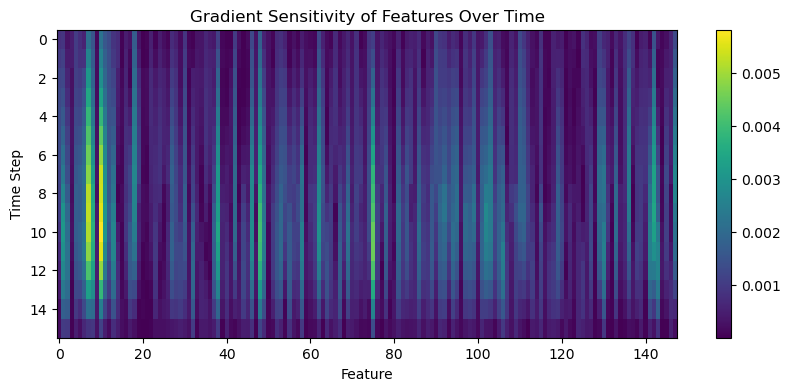

In [632]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 确保我们在Eager Execution模式下（TensorFlow 2.x默认启用）
assert tf.executing_eagerly()

# 将NumPy数组转换为TensorFlow张量
sample_to_analyze = tf.convert_to_tensor(X_test[0:1])

# 使用GradientTape来记录计算过程，以便自动获取梯度
with tf.GradientTape() as tape:
    # 将输入数据标记为需要梯度信息的张量
    tape.watch(sample_to_analyze)
    
    # 通过模型前向传播得到预测结果
    prediction = model(sample_to_analyze)
    
# 计算输入相对于预测结果的梯度
grads = tape.gradient(prediction, sample_to_analyze)

# 梯度的绝对值可以被看作是模型对每个输入特征的重视程度
grads_abs = np.abs(grads.numpy())

# 可视化
plt.figure(figsize=(10, 4))
plt.imshow(grads_abs[0], cmap='viridis', aspect='auto')
plt.colorbar()
plt.ylabel('Time Step')
plt.xlabel('Feature')
plt.title('Gradient Sensitivity of Features Over Time')
plt.show()


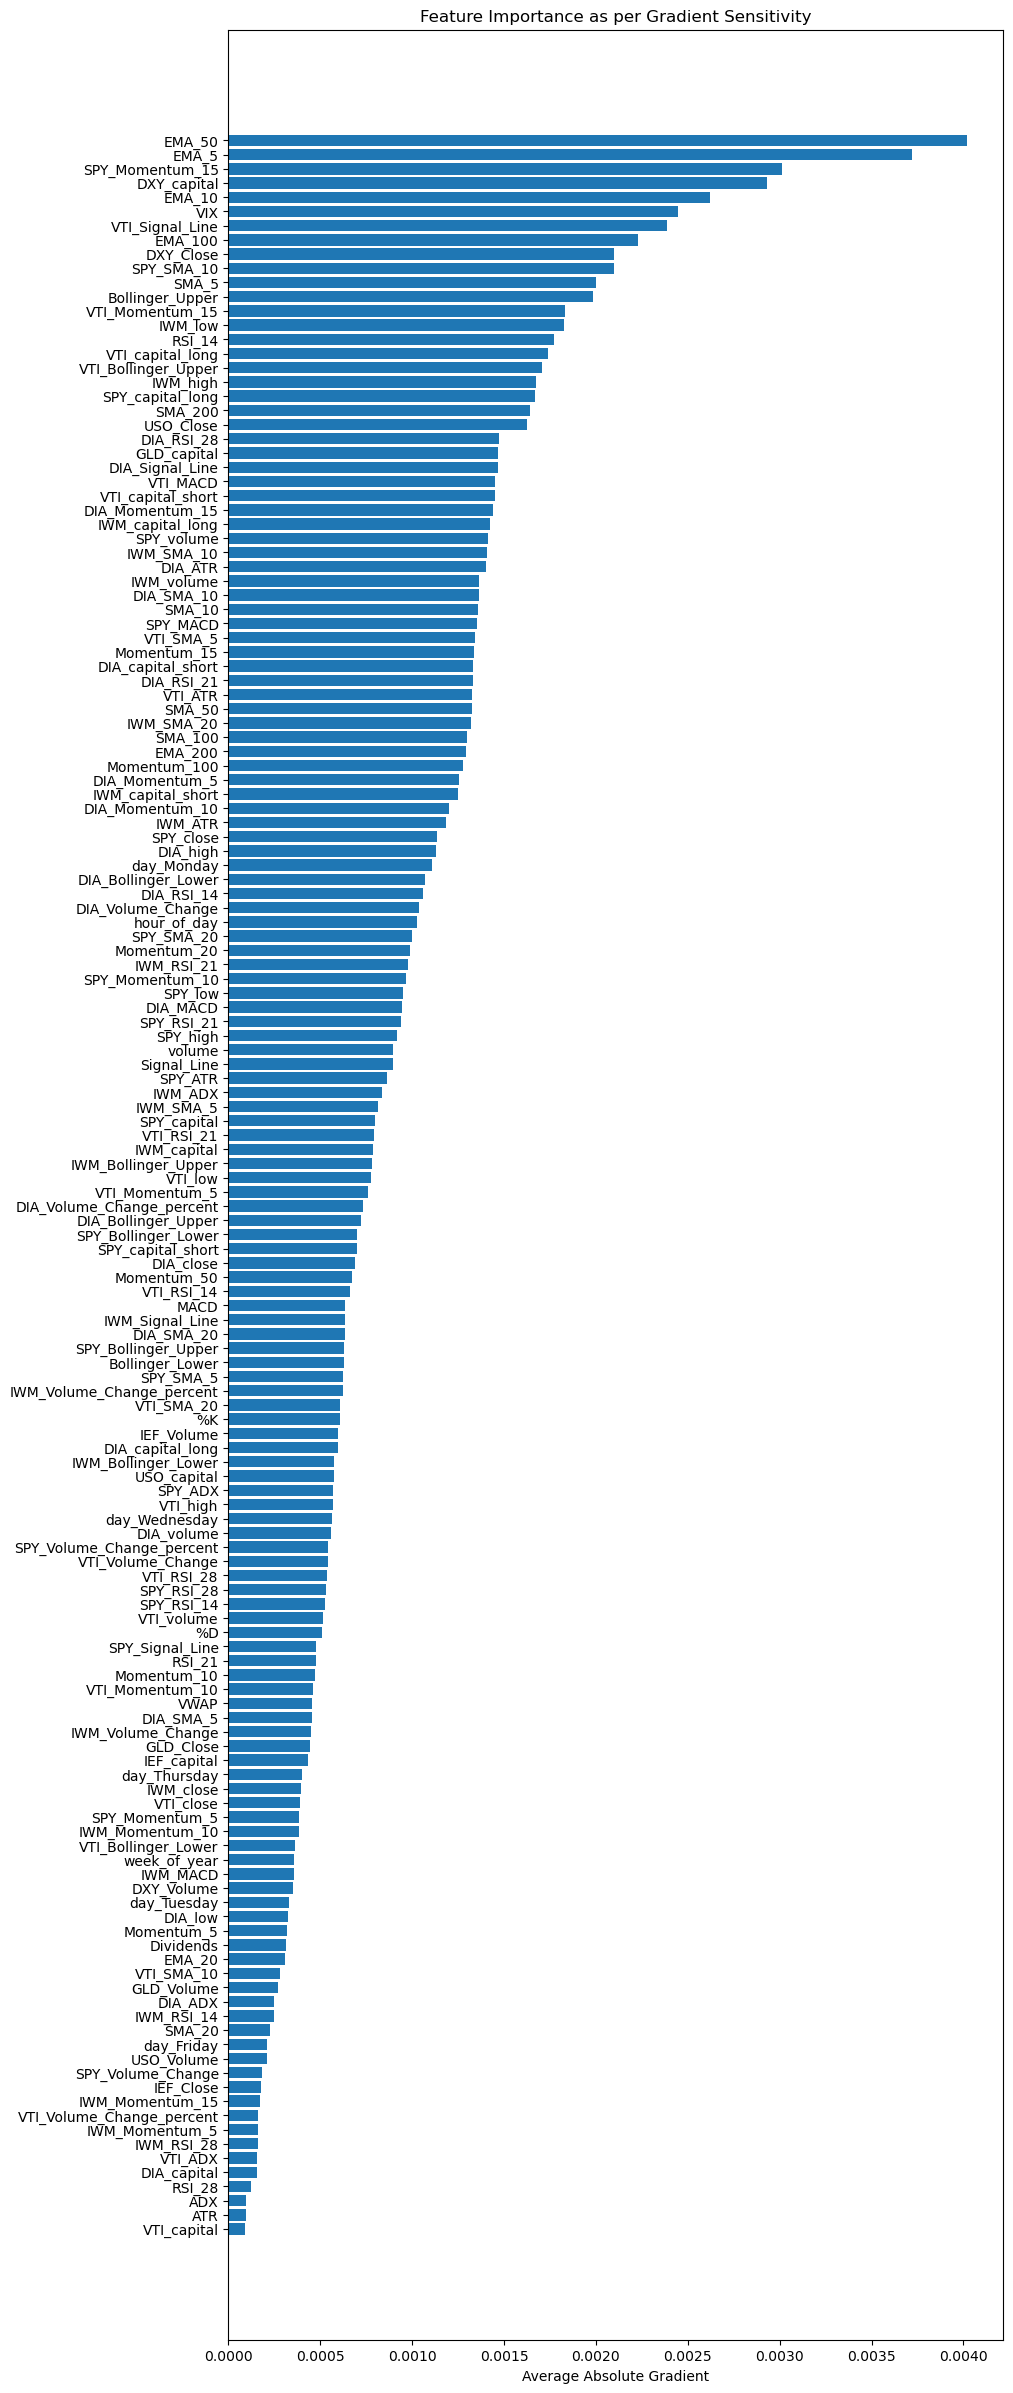

In [665]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 假设X_test已经是tf.Tensor，如果不是，使用tf.convert_to_tensor转换
# 假设features_names包含了除去不参与训练的特征（'close', 'time', 'open', 'high', 'low'）后的所有特征名称
features_names = list(features.columns) + ['close']

# 选择一个样本进行分析
sample_to_analyze = tf.convert_to_tensor(X_test[0:1], dtype=tf.float32)

# 使用GradientTape来记录计算过程，以便自动获取梯度
with tf.GradientTape() as tape:
    tape.watch(sample_to_analyze)
    prediction = model(sample_to_analyze)

# 计算输入相对于预测结果的梯度
grads = tape.gradient(prediction, sample_to_analyze)
grads_abs = np.abs(grads.numpy())

# 计算每个特征的平均梯度绝对值
mean_grads_abs = np.mean(grads_abs, axis=(0,1))

# 将特征名称和对应的平均梯度绝对值绑定在一起，然后按梯度绝对值排序
features_grads = zip(features_names, mean_grads_abs)
sorted_features_grads = sorted(features_grads, key=lambda x: x[1], reverse=True)

# 分别解压特征名称和对应的排序后的梯度绝对值
sorted_features, sorted_grads = zip(*sorted_features_grads)

# 可视化
plt.figure(figsize=(10, 30))
plt.barh(range(len(sorted_features)), sorted_grads, tick_label=sorted_features)
plt.xlabel('Average Absolute Gradient')
plt.title('Feature Importance as per Gradient Sensitivity')
plt.gca().invert_yaxis()  # 将最重要的特征显示在顶部
plt.show()


In [634]:
y_train_pred.shape

(8036, 1)

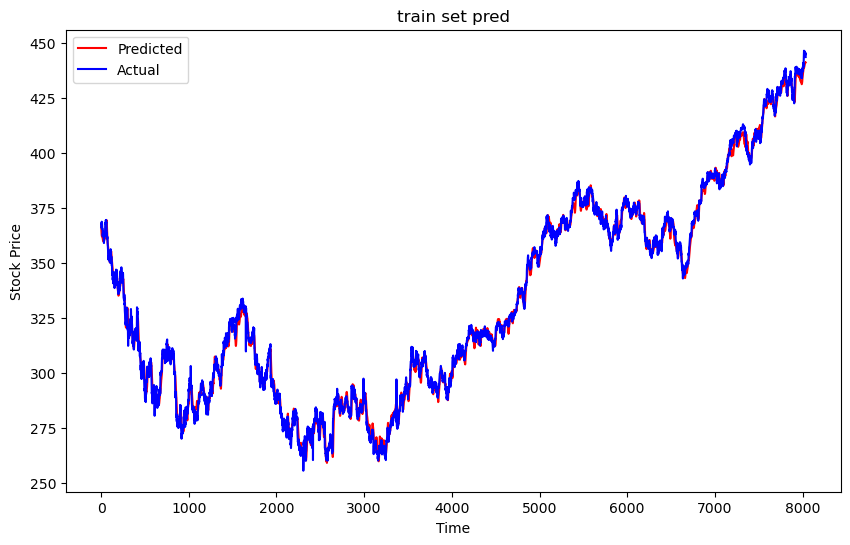

In [635]:
import matplotlib.pyplot as plt

# 由于y_pred可能是二维的，且只有一列，我们首先确保它是一维的
if y_pred.ndim > 1:
    y_pred = y_pred.squeeze()

# 逆缩放预测和测试集的数据
y_train_pred_rescaled = scaler_label.inverse_transform(y_train_pred.reshape(-1, 1))
y_train_rescaled = scaler_label.inverse_transform(y_train.reshape(-1, 1))

# 绘制预测值和实际值
plt.figure(figsize=(10, 6))  # 可以调整图形大小
plt.plot(y_train_pred_rescaled, label='Predicted', color='red')  # 预测值
plt.plot(y_train_rescaled, label='Actual', color='blue')  # 实际值
plt.title('train set pred')  # 图表标题
plt.xlabel('Time')  # X轴标签
plt.ylabel('Stock Price')  # Y轴标签
plt.legend()  # 显示图例
plt.show()


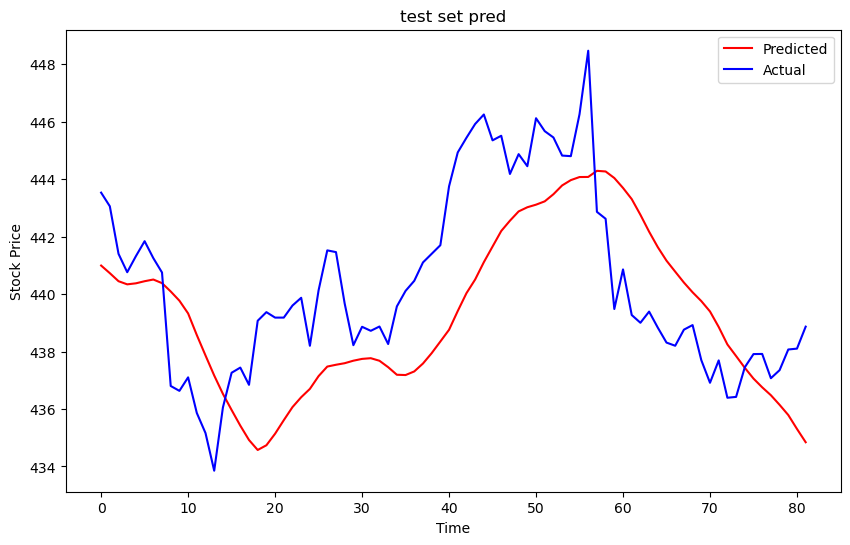

In [636]:
import matplotlib.pyplot as plt

# 由于y_pred可能是二维的，且只有一列，我们首先确保它是一维的
if y_pred.ndim > 1:
    y_pred = y_pred.squeeze()

# 逆缩放预测和测试集的数据
y_pred_rescaled = scaler_label.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler_label.inverse_transform(y_test.reshape(-1, 1))

# 绘制预测值和实际值
plt.figure(figsize=(10, 6))  # 可以调整图形大小
plt.plot(y_pred_rescaled, label='Predicted', color='red')  # 预测值
plt.plot(y_test_rescaled, label='Actual', color='blue')  # 实际值
plt.title('test set pred')  # 图表标题
plt.xlabel('Time')  # X轴标签
plt.ylabel('Stock Price')  # Y轴标签
plt.legend()  # 显示图例
plt.show()


In [637]:
bench_mark_df = pd.DataFrame(y_test_rescaled)
bench_mark_df.columns = ['close']
bench_mark_df['prediction'] = bench_mark_df['close'].shift(1)

In [638]:
bench_mark_df = bench_mark_df.dropna(how='any')

In [639]:
print('test set mse: ',mean_squared_error(y_test_rescaled, y_pred_rescaled))
print('benchmark mse: ',mean_squared_error(bench_mark_df['close'], bench_mark_df['prediction']))
print('train set mse: ',mean_squared_error(y_train_rescaled, y_train_pred_rescaled))

test set mse:  7.9438630391256035
benchmark mse:  1.5793829284533094
train set mse:  7.961701899774503


In [640]:
y_pred_rescaled.shape

(82, 1)

In [641]:
y_test_rescaled.shape

(82, 1)

# 计算回报

In [642]:
X_train.shape

(8036, 16, 148)

In [643]:
scaler_features.inverse_transform(X_test[0,-1,:].reshape(1,-1))

array([[ 0.00000000e+00,  4.44482044e+02,  4.44906523e+02,
         4.45296013e+02,  4.40978640e+02,  4.38848291e+02,
         4.35431776e+02,  4.44358177e+02,  4.44678786e+02,
         4.44346958e+02,  4.42040536e+02,  4.39508555e+02,
         4.36479949e+02,  3.94220064e+01,  4.83207320e+01,
         6.38600132e+01,  8.09775687e-01,  1.28907387e+00,
         4.46713970e+02,  4.43878055e+02,  1.37184199e+00,
         2.32150455e+01,  3.28749466e+02,  4.85436893e+01,
         3.35606391e+01, -1.92501465e+00, -2.53000000e+00,
        -1.55000000e+00, -1.67998901e+00,  8.10501465e+00,
         5.22000488e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+01,  1.60000000e+01,  1.34899998e+01,
         0.00000000e+00,  1.96009995e+02,  1.22163000e+07,
         2.39451690e+09,  9.41900024e+01,  6.64160000e+06,
         6.25572320e+08,  9.80899963e+01,  6.12500000e+05,
         6.00801228e+07,  7.40100021e+01,  3.33270000e+0

In [644]:
test_start_position_direct = len(y_train)+time_step - 1

In [645]:
test_df = df.iloc[test_start_position_direct:test_start_position_direct+len(y_test)]

In [646]:
test_df['predicted_close_in1h'] = y_pred_rescaled.squeeze()
test_df['actual_close_in1h'] = y_test_rescaled.squeeze()

/var/folders/t2/vmnkmyxs42b6h_fbsdjtsp0c0000gn/T/ipykernel_575/1096888416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_close_in1h'] = y_pred_rescaled.squeeze()
/var/folders/t2/vmnkmyxs42b6h_fbsdjtsp0c0000gn/T/ipykernel_575/1096888416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['actual_close_in1h'] = y_test_rescaled.squeeze()


In [647]:
df_1h_magnify = test_df[['close','actual_close_in1h','predicted_close_in1h']]

In [648]:
df_1h_magnify.head(20)

,close,actual_close_in1h,predicted_close_in1h
Date,,,
2024-03-04 16:00:00-05:00,443.590000,443.530000,440.991821
2024-03-04 17:00:00-05:00,443.530000,443.055000,440.726959
2024-03-04 18:00:00-05:00,443.055000,441.400000,440.446838
2024-03-05 04:00:00-05:00,441.400000,440.760000,440.337708
2024-03-05 05:00:00-05:00,440.760000,441.320000,440.373291
2024-03-05 06:00:00-05:00,441.320000,441.840000,440.446716
2024-03-05 07:00:00-05:00,441.840000,441.250000,440.505371
2024-03-05 08:00:00-05:00,441.250000,440.750000,440.380280
2024-03-05 09:00:00-05:00,440.750000,436.799988,440.089600


In [649]:
df_1h_magnify['true_updown_in1h'] = df_1h_magnify['actual_close_in1h']/df_1h_magnify['close'] - 1
df_1h_magnify['predict_updown_in1h'] = df_1h_magnify['predicted_close_in1h']/df_1h_magnify['close'] - 1

/var/folders/t2/vmnkmyxs42b6h_fbsdjtsp0c0000gn/T/ipykernel_575/2636791147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1h_magnify['true_updown_in1h'] = df_1h_magnify['actual_close_in1h']/df_1h_magnify['close'] - 1
/var/folders/t2/vmnkmyxs42b6h_fbsdjtsp0c0000gn/T/ipykernel_575/2636791147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1h_magnify['predict_updown_in1h'] = df_1h_magnify['predicted_close_in1h']/df_1h_magnify['close'] - 1


In [650]:
df_1h_magnify

,close,actual_close_in1h,predicted_close_in1h,true_updown_in1h,predict_updown_in1h
Date,,,,,
2024-03-04 16:00:00-05:00,443.590000,443.530000,440.991821,-0.000135,-0.005857
2024-03-04 17:00:00-05:00,443.530000,443.055000,440.726959,-0.001071,-0.006320
2024-03-04 18:00:00-05:00,443.055000,441.400000,440.446838,-0.003735,-0.005887
2024-03-05 04:00:00-05:00,441.400000,440.760000,440.337708,-0.001450,-0.002407
2024-03-05 05:00:00-05:00,440.760000,441.320000,440.373291,0.001271,-0.000877
...,...,...,...,...,...
2024-03-11 13:30:00-04:00,437.915009,437.070007,436.478241,-0.001930,-0.003281
2024-03-11 14:30:00-04:00,437.070007,437.350006,436.143890,0.000641,-0.002119
2024-03-11 15:30:00-04:00,437.350006,438.070000,435.788696,0.001646,-0.003570


In [651]:
df_1h_magnify['close'].shift(-12).round(4) == df_1h_magnify['actual_close_in1h'].round(4)

Date
2024-03-04 16:00:00-05:00    False
2024-03-04 17:00:00-05:00    False
2024-03-04 18:00:00-05:00    False
2024-03-05 04:00:00-05:00    False
2024-03-05 05:00:00-05:00    False
                             ...  
2024-03-11 13:30:00-04:00    False
2024-03-11 14:30:00-04:00    False
2024-03-11 15:30:00-04:00    False
2024-03-11 16:00:00-04:00    False
2024-03-11 17:00:00-04:00    False
Length: 82, dtype: bool

In [652]:
df_1h_magnify = df_1h_magnify.dropna(how='any')

df_1h_magnify['direction_same'] = (df_1h_magnify['true_updown_in1h'] * df_1h_magnify['predict_updown_in1h']) > 0

# 计算方向相同的次数
direction_same_count = df_1h_magnify['direction_same'].sum()

direction_same_count/len(df_1h_magnify)

0.4024390243902439

In [653]:
df_1h_magnify.to_csv('test.csv')

In [654]:
df_1h_magnify['true_updown_in1h'].quantile(0.05)

-0.0037934924783007084

In [655]:
df_1h_magnify['true_updown_in1h'].quantile(0.95)

0.004372019139305552

In [656]:
df_1h_magnify

,close,actual_close_in1h,predicted_close_in1h,true_updown_in1h,predict_updown_in1h,direction_same
Date,,,,,,
2024-03-04 16:00:00-05:00,443.590000,443.530000,440.991821,-0.000135,-0.005857,True
2024-03-04 17:00:00-05:00,443.530000,443.055000,440.726959,-0.001071,-0.006320,True
2024-03-04 18:00:00-05:00,443.055000,441.400000,440.446838,-0.003735,-0.005887,True
2024-03-05 04:00:00-05:00,441.400000,440.760000,440.337708,-0.001450,-0.002407,True
2024-03-05 05:00:00-05:00,440.760000,441.320000,440.373291,0.001271,-0.000877,False
...,...,...,...,...,...,...
2024-03-11 13:30:00-04:00,437.915009,437.070007,436.478241,-0.001930,-0.003281,True
2024-03-11 14:30:00-04:00,437.070007,437.350006,436.143890,0.000641,-0.002119,False
2024-03-11 15:30:00-04:00,437.350006,438.070000,435.788696,0.001646,-0.003570,False


# 模型表现

In [657]:
#config

buy_threshold = 0.005
sell_threshold = -0.005

In [658]:
# 初始化资金和仓位
initial_capital = 1000
buy_unit = 1000
capital = initial_capital
waiting_period_set = 1
position = 0  # 当前仓位，正数为持有，负数为卖空
trade_count = 0  # 交易次数
waiting_period = 0  # 等待期间的计数器，用于自动平仓
capital_list = []
total_asset_list = []  # 资产总价值列表
trade_signals = [0] * len(df_1h_magnify)


for i, (index, row) in enumerate(df_1h_magnify.iterrows()):
    
    predict_change_rate = row['predict_updown_in1h']
    
    # 每五分钟检查一次，如果有持仓且等待期间到了，自动平仓
    if waiting_period > 0:
        waiting_period -= 1
        if waiting_period == 0 and position != 0:
            capital += position * row['close']
            position = 0  # 清仓

    # 买入信号处理
    if predict_change_rate > buy_threshold:
    #if predict_change_rate < sell_threshold:

        trade_signals[i] = 1  # 买入信号
        if position <= 0:  # 如果仓位为负或为0，则买入
            if position < 0:
                # 如果已有持仓，则先平仓
                capital += position * row['close']
            # 买入
            position = buy_unit / row['close']
            capital -= position * row['close']
            waiting_period = waiting_period_set  # 设置等待期间为12个时间点，即一个小时
            trade_count += 1
        else:
            # 仓位为正，重置等待期间
            waiting_period = waiting_period_set

    # 卖出信号处理
    elif predict_change_rate < sell_threshold:
    #elif predict_change_rate > buy_threshold:
        
        trade_signals[i] = -1  # 卖出信号
        if position >= 0:  # 如果仓位为正或为0，则卖空
            if position > 0:
                # 如果已有持仓，则先平仓
                capital += position * row['close']
            # 卖空
            position = -buy_unit / row['close']
            capital += abs(position) * row['close']
            waiting_period = waiting_period_set  # 设置等待期间为12个时间点，即一个小时
            trade_count += 1
        else:
            # 仓位为负，重置等待期间
            waiting_period = waiting_period_set
    total_asset_value = capital + (position * row['close'])
    total_asset_list.append(total_asset_value)
        
    # 检查是否是DataFrame的最后一行
    if index == df_1h_magnify.index[-1] and position != 0:
        # 如果是最后一期，则关闭所有仓位
        capital += position * row['close']
        position = 0  # 清仓
    capital_list.append(capital)

# 计算总回报
total_return = capital - initial_capital
df_1h_magnify['capital_list'] = capital_list
df_1h_magnify['total_asset_list'] = total_asset_list

In [659]:
total_return

11.338003558850232

In [660]:
df_1h_magnify['capital_list'][-1]/1000-1

0.011338003558850174

In [661]:
df_1h_magnify['close'][-1]/df_1h_magnify['close'][0] -1

-0.012376293424107732

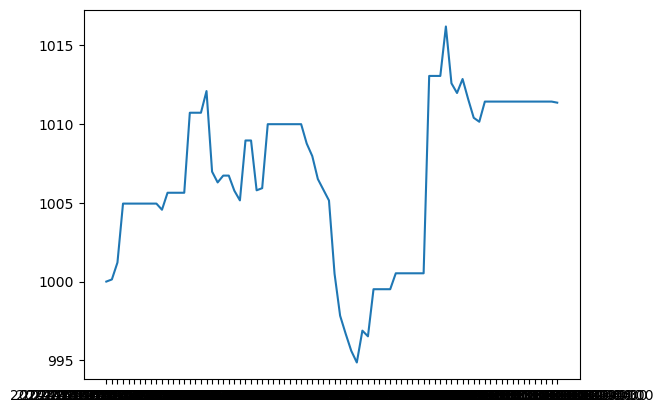

In [662]:
plt.plot(df_1h_magnify.index,df_1h_magnify['total_asset_list'])

In [663]:
import numpy as np

# 假设 df_1h_magnify['close'] 存在且已经有了 total_asset_list
close_prices = df_1h_magnify['close'].values
normalized_close_prices = close_prices / close_prices[0]  # 归一化收盘价

total_assets = np.array(total_asset_list)
normalized_total_assets = total_assets / total_assets[0]  # 归一化资产总价值

# 更新DataFrame，以便比较
df_1h_magnify['normalized_close'] = normalized_close_prices
df_1h_magnify['normalized_total_assets'] = normalized_total_assets

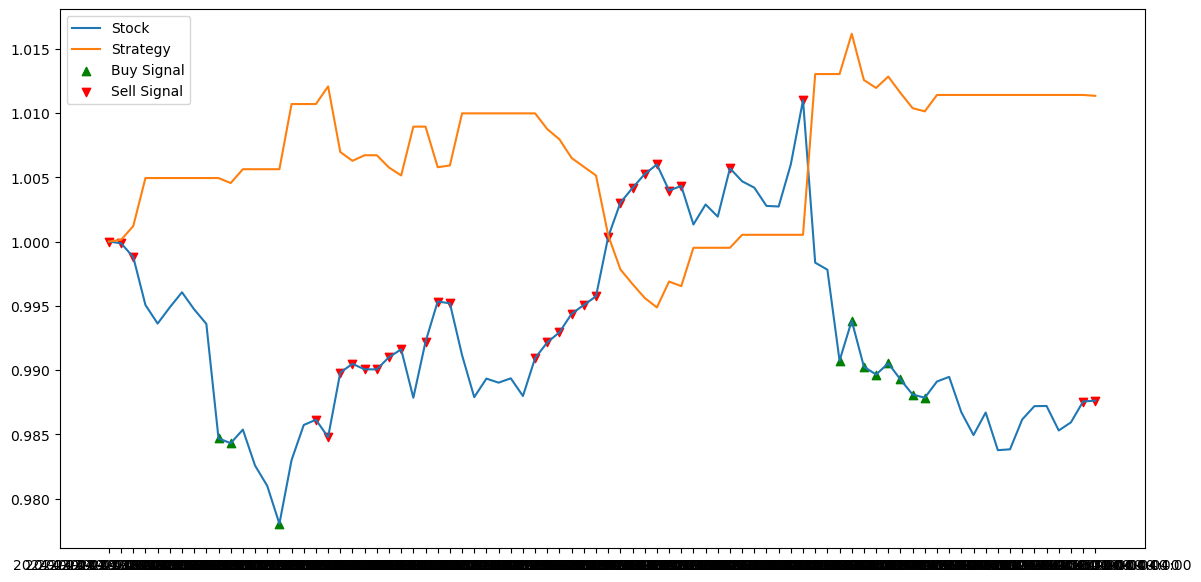

In [664]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 设置图像大小
plt.figure(figsize=(14, 7))


# 添加买入卖出标记，使用不同颜色区分买入和卖出
buy_signals = [i for i, signal in enumerate(trade_signals) if signal == 1]
sell_signals = [i for i, signal in enumerate(trade_signals) if signal == -1]

# 绘制归一化的收盘价和资产总价值
plt.plot(df_1h_magnify.index, df_1h_magnify['normalized_close'], label='Stock')
plt.plot(df_1h_magnify.index, df_1h_magnify['normalized_total_assets'], label='Strategy')

# 添加买入卖出标记，使用不同颜色区分买入和卖出
# 这次直接使用有效的索引列表进行绘制
plt.scatter(df_1h_magnify.index[buy_signals], df_1h_magnify['normalized_close'].iloc[buy_signals], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(df_1h_magnify.index[sell_signals], df_1h_magnify['normalized_close'].iloc[sell_signals], color='red', label='Sell Signal', marker='v', alpha=1)

plt.legend()
plt.show()

In [614]:
buy_signals

[9,
 10,
 12,
 13,
 14,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76]

In [555]:
sell_signals

[27, 42, 43, 44, 45, 57, 80, 81]

In [165]:
yf.download('QQQ', period="2y", interval="1h")

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['QQQ']: Exception('%ticker%: 1h data not available for startTime=921076200 and endTime=1710205529. The requested range must be within the last 730 days.')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [162]:
import yfinance as yf

In [167]:
730/365

2.0